In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
# Preprocess the data by reshaping it into a 4D tensor
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [4]:
# One-hot encode the labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [5]:
# Build the model
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu',
input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [6]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam',
metrics=['accuracy'])


In [7]:
# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=1, validation_split=0.1)

422/422 [==============================] - 19s 41ms/step - loss: 0.2712 - accuracy: 0.9221 - val_loss: 0.0891 - val_accuracy: 0.9765


In [8]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0989 - accuracy: 0.9702
Test accuracy: 0.9702000021934509


In [9]:
# Predict the class of an image
predictions = model.predict(x_test[:1])

1/1 [==============================] - 0s 157ms/step


In [10]:
# Get the class with the highest probability
predicted_label = np.argmax(predictions[0])

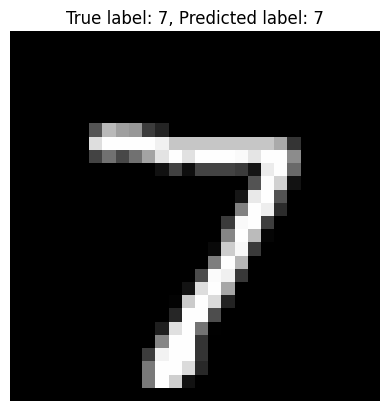

In [11]:
# Plot the image and its predicted label
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title("True label: %d, Predicted label: %d" % (np.argmax(y_test[0]),
predicted_label))
plt.axis('off')
plt.show()